In [42]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

 <h1>I have not studied Data Anylitical course so this dataset is complete new for me</h1>

In [43]:
# I have not studied Data anyaltics course, So, this dataset is completely new for me
# loading the dataset 
df = pd.read_csv("Housing_Prices.csv")

In [44]:
# let's see what we have in the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.00,2,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


<p>We can see in the data that we have many yes/no fields and one field with multiple text categories. We have to convert all of these correctly into numeric format.</p>

In [45]:
# quickly check if we have missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<h3>Convert no/yes -columns into 0/1</h3>

In [47]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
# from sklearn.preprocessing import LabelEncoder
# variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# encoder = LabelEncoder()
# df[variables] = df[variables].apply(encoder.fit_transform)

<h3>Convert text categories with multiple choices into multiple variables</h3>

In [48]:
# when converting a category with multiple options
# into multiple variables, we can always remove the last one of them
# for the optimizations. See the ANN regression materials why this works 
# (the Rovaniemi/Oulu/Helsinki -example)
# df = df.drop(["id", "date",  "sqft_living15",  "waterfront","sqft_lot15", "long", "lat","zipcode"], axis=1)
df = df.drop(["id", "date","floors","bedrooms"], axis=1)

In [49]:
df.head(10)

,price,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.00,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,1225000.00,4.50,5420,101930,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,257500.00,2.25,1715,6819,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,291850.00,1.50,1060,9711,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,229500.00,1.00,1780,7470,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,323000.00,2.50,1890,6560,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


In [50]:
df["view"].unique()

array([0, 3, 4, 2, 1])

In [51]:
# printing out the column names for easier copying for X/y
df.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

<h3>X/y -variables</h3>

In [52]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[["bathrooms","sqft_living","sqft_lot",
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated',"sqft_living15",  "waterfront","sqft_lot15", "long", "lat","zipcode"]]
# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y = df['price']

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,sqft_lot,396029092.85
12,sqft_lot15,187396143.23
9,yr_renovated,9283729.13
1,sqft_living,5497630.88
6,sqft_above,4434186.56
7,sqft_basement,4405626.51
10,sqft_living15,2772242.04
3,view,19413.99
11,waterfront,8184.49
0,bathrooms,2840.78


<h3>Train/test/validation -split</h3>

In [54]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [55]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 15129
Test data amount: 3242
Validation data amount: 3242


<h1> First Approach</h1>

In [ ]:
# by using Sequential neural network model and changing the layers nodes along with manuplating the colum, I droping the colums like id, date and bedroom, bathrooms, time zoon, or tried to experiment with different colums as well, Unfortunatielly I get just only best R-squared value 0.71, in other experiments or manuplation sometime i got 6, 6.5, or 5 like that..
# model = keras.Sequential(
#     [
#         layers.Dense(8, activation="relu", input_shape=(variable_amount,)),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(16, activation="relu"),
#         layers.Dense(1)
#     ]
# )

<h1> Second Approach & Optimization</h1>

In [69]:
# I feel there is something wrong like underfitting and I could not get the best results, so i am changing my approach and applying optimization along with best checkpoint and saving the best score

# model = keras.Sequential(
#     [
#         layers.BatchNormalization(input_shape=(variable_amount,)),
#         layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
#         layers.Dropout(0.1),
#         layers.Dense(8, activation="relu"),
#         layers.Dense(1)
#     ]
# )

<h3>Create neural network structure</h3>

In [56]:
  #variable_amount = len(X.columns)


# Second Approch


 #model = keras.Sequential(
  #  [
   #     layers.BatchNormalization(input_shape=(variable_amount,)),
    #    layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
     #   layers.Dropout(0.1),
      #  layers.Dense(8, activation="relu"),
       # layers.Dense(1)
   # ]
#)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent

    #model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
 # model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,165 (4.55 KB)

 Trainable params: 1,165 (4.55 KB)

 Non-trainable params: 0 (0.00 B)

<h3>Train the neural network with our data</h3>

In [57]:
# using validation again for better metrics and optimization
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - loss: 249634488320.0000 - val_loss: 110779121664.0000
Epoch 2/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 123851636736.0000 - val_loss: 105049858048.0000
Epoch 3/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 108053086208.0000 - val_loss: 90735968256.0000
Epoch 4/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 89754034176.0000 - val_loss: 59862482944.0000
Epoch 5/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 65879101440.0000 - val_loss: 56401207296.0000
Epoch 6/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 63011491840.0000 - val_loss: 54610825216.0000
Epoch 7/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 61684846592.0000 - val_loss: 52870778880.0000
Epoch 8/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 61453443072.0000 - val_loss: 52105252864.0000
Epoch 9/1000
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 61492064256.0000 - val_loss: 51903291392.0000
Epoch 10/1000
473/

<h3>Training metrics</h3>

<Axes: >

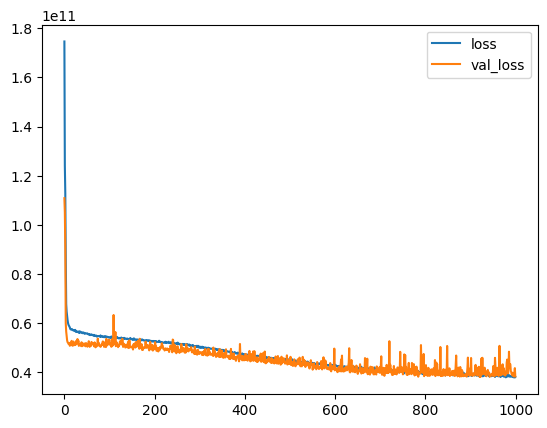

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
# compare test error values to training error values
# the model is often good when these error values are similar
# even if you training metrics above didn't overlap
# you might still get very close values in evaluation => more important

# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
47248711680.0

Train data evaluation:
36613627904.0


<h3>Make some test predictions to see what kind of mistakes the model makes</h3>

In [60]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


,Test True Y,Model Predictions
0,470000.00,452012.03
1,385000.00,388375.25
2,488500.00,339159.59
3,890000.00,730963.69
4,300000.00,610444.44
...,...,...
3237,450000.00,346140.88
3238,1375000.00,975023.62
3239,625000.00,470643.75
3240,520000.00,806924.12


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

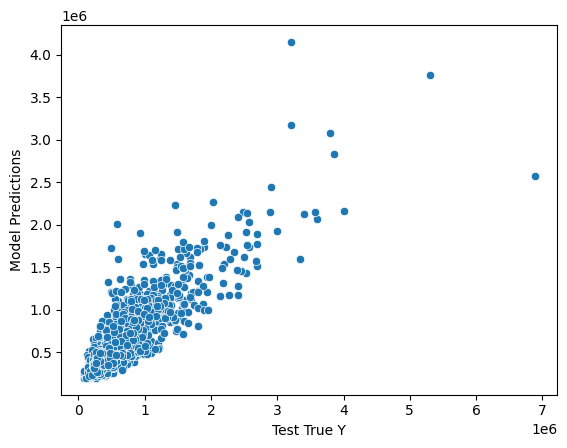

In [61]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

<h3>Regression error metrics</h3>

In [62]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
135506.68 $

MSE
47248720550.31 $^2

RMSE:
217367.71 $

R-squared:
0.71

Explained variance score:
0.71


/var/folders/gc/n9f0hqw521d0_z3nmf82zyrc0000gn/T/ipykernel_1691/3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


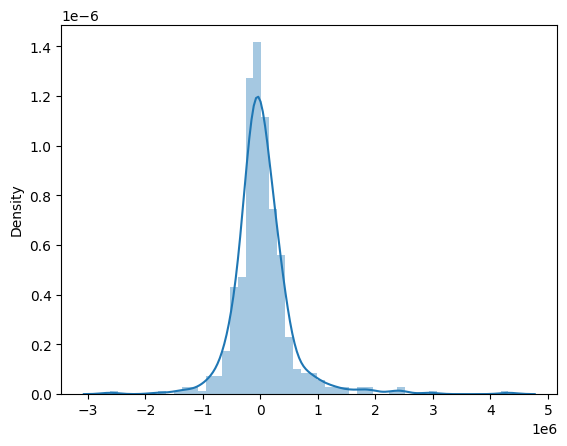

In [63]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

<h2>Lets' try the model in practice</h2>

In [64]:
X.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'waterfront', 'sqft_lot15', 'long', 'lat', 'zipcode'],
      dtype='object')

In [65]:
df.head()

,price,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.00,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [66]:
df['bedrooms'].unique()


KeyError: 'bedrooms'

In [ ]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
    'bedrooms': 3,
    'bathrooms': 2.0, 
    'sqft_living': 1680, 
    'sqft_lot': 8080,
    'floors': 1.0, 
    'view': 0,
    'condition': 3, 
    'grade': 8, 
    'sqft_above': 1680, 
    'sqft_basement': 0, 
    'yr_built': 1987,
    'yr_renovated': 0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this house:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

In [ ]:
len(y_test)